# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# My work

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

df = pd.read_csv("../Temperature/human_body_temperature.csv")
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
#Default plots
sns.set(rc={"figure.figsize": (16, 9), 'legend.fontsize': 20})  
plt.rc('axes',   titlesize=20)                                  
plt.rc('axes',   labelsize=20)                                 
plt.rc('figure', titlesize=20)                                  

plt.rc('xtick',  labelsize=20)                                  
plt.rc('ytick',  labelsize=20)                                  

#To help us be consistent
np.random.seed(33)

# Exploring The Data

In [9]:
print(df.sample(10))
df.describe()

#This tells us that there are 130 data points for temperature and for heart rate, 
#and the mean temperature found is 98.25, while the mean heart rate is 73.76, not split by gender.

     temperature gender  heart_rate
110         98.8      F        69.0
48          97.9      M        76.0
37          98.3      M        72.0
46          97.4      M        72.0
93          97.1      M        73.0
51          98.3      F        80.0
92          98.8      F        84.0
120         97.7      F        84.0
101         98.5      M        68.0
118         98.7      M        78.0


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Question 1
## Is the distribution of body temperatures normal? 
Based on the histogram findings and the ECDF (empirical/observed distribution function), we can consider body temperatures to be normally distributed.

# Histogram : Looking at distribution

Let's begin with this visualization method to address question 1 and understand the data more fully. We'll use the closest square root of the dataset size for the bin choice, which is 11.

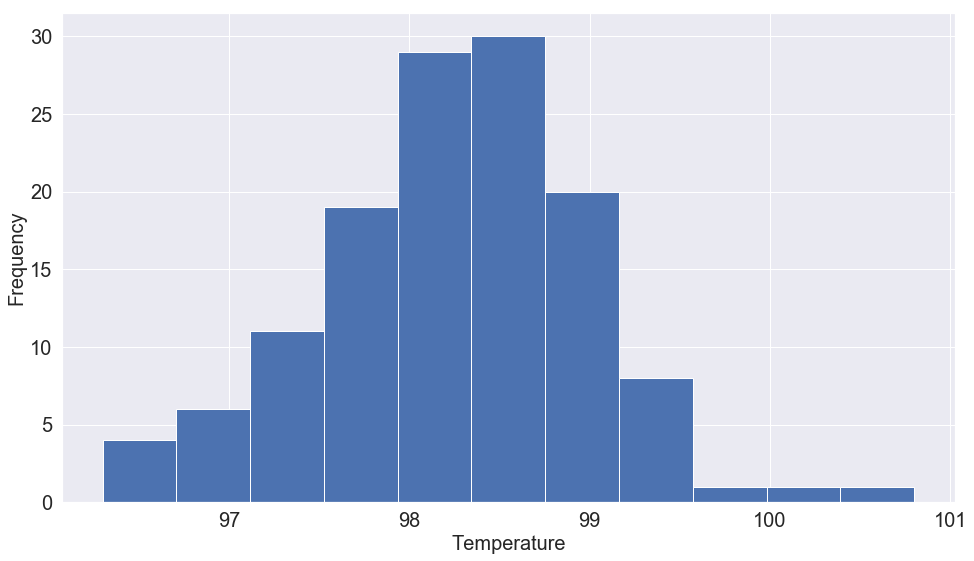

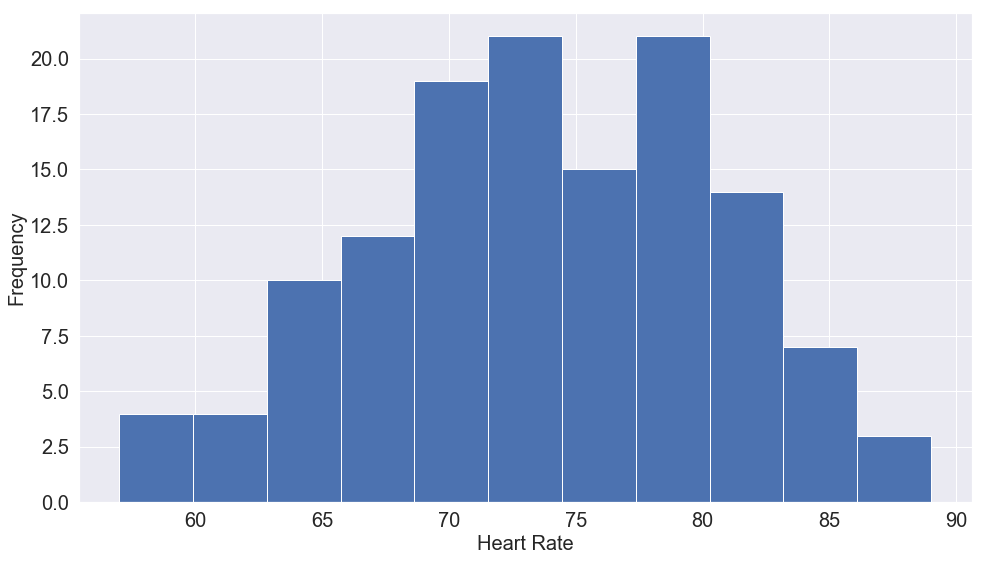

In [60]:
df.temperature.hist(bins=int(np.sqrt(len(df))))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

df.heart_rate.hist(bins=int(np.sqrt(len(df))))
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Is the data evenly grouped into male and female subjects? Yes! Which makes this straightforward.

df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

# ECDF 

* Checking for normality in our dataset with ECDF against a theoretical CDF.

In [12]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
from scipy import stats
import scipy.stats as st


warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
temp = np.array(df['temperature'])

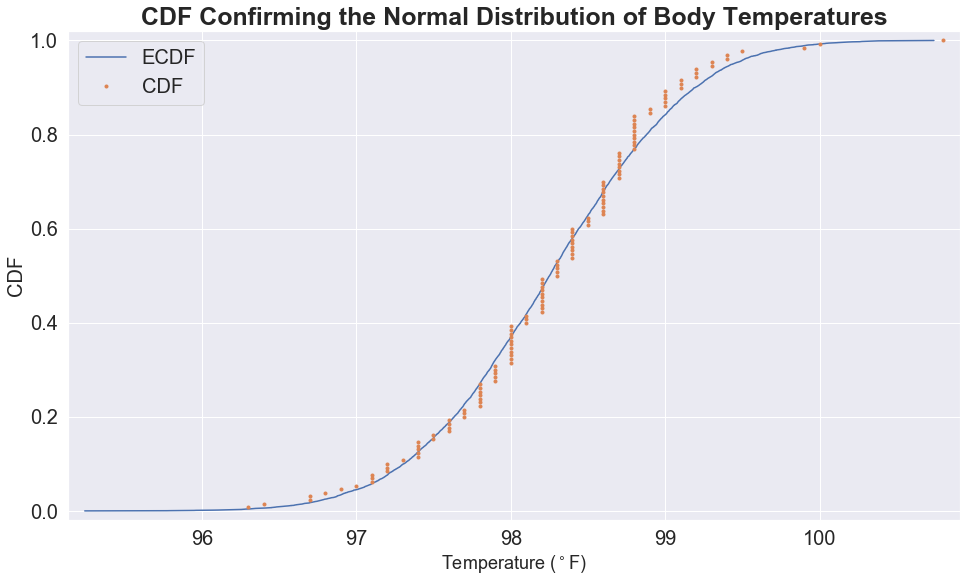

In [13]:
#compute ECDF for a one-dimensional array of measurements
def ecdf(data):

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1.0,n+1) / n
    
    return x, y

#computing mu for mean and sigma for standard deviation
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.legend(('ECDF', 'CDF'), loc='upper left')
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize=18)
_ = plt.ylabel('CDF')
_ = plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=25, fontweight = 'bold')
plt.show()

In [30]:
st.mstats.normaltest(df['temperature'])

#because p is greater than alpha we fail to reject H0, 
# we conclude the data set is normally distributed.)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

# Question 2

## Is the Sample Size Large? Are the Observations Independent?

In [47]:
# Print the body temperature sample size:
n = df.temperature.count()
print(n)

130


* The sample size for body temperature is 130. Because this is greater than 30, it is considered large!
* 
The observations are independent, as they are not influenced by one another and reveal no information about any other observation. Each value for temperature represents a distinct measure. 

# Question 3

## Is the true population mean really 98.6 degrees F?

Here we will use a null hypothesis of: The true population mean is equal to the conventional mean (98.6∘F). H0:μ−98.6=0. Using a significance level of 95% confidence, our α=0.05.

* The p value is below the significance level, so the null hypothesis can be rejected. So no, the true population mean is not 98.6 degrees F.

   > First, try a bootstrap hypothesis test.
   * See Box 110.
   
   >  Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
   * One sample test, because we are testing whether the data points are significantly different from a hypothesized set of values. We would only do a two-sample test if we had two sets of data measuring the same thing in two different groups of people for example, if we were comparing the mean temperature between two different age groups.
  
  >  In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic? 
   * With our sample size of 130, this set is larger than 30 and therefore requires a z-test. Also able to use a z-test because standard deviation and is known and we know this set of data has a normal distribution from our previous testing.
  
  > Now try using the other test. How is the result be different? Why? 
  * After gathering the p-value from both the z-test and t-test, the p-values are essentially the same. The slighty larger p-value from the t-test is due to the difference in formulas. In the t-test formula, you use degrees of freedom, which in this case is 129 (n-1) and the z-test formula doesn't incorporate degrees of freedom. 

# Bootstrap Hypothesis Test

In [35]:
# Bootstrap Hypothesis Test
size = 100000
bs_replicates = np.empty(size)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'],len(df['temperature'])))
    
# Compute fraction of replicates that are equal to the 98.6
bs_replicates = np.around(bs_replicates, decimals=4) 
p = np.sum(bs_replicates == 98.6) / size

print('Given that p-value for bootstrap hypothesis test = ', p, ', we reject the null hypothesis that the true population mean is equal to the conventional mean (98.6∘F)')

Given that p-value for bootstrap hypothesis test =  0.0 , we reject the null hypothesis that the true population mean is equal to the conventional mean (98.6∘F)


# Frequentist Statistical Tests
## One-sample z-test, p-value and 'other' t-test

In [31]:
# One sample z-test
z = (np.mean(df.temperature) - 98.6)*np.sqrt(df.shape[0])/np.std(df.temperature)

# One sample t-test
t = stats.ttest_1samp(df.temperature, 98.6)[0]

print('z score:',z)
print('t score:', t)
print('p value z test :',stats.norm.cdf(z))
print('p value t test :', stats.t.sf(np.abs(z), df.shape[0]-1)*2)

z score: -5.475925202078116
t score: -5.4548232923645195
p value z test : 2.1761575829410943e-08
p value t test : 2.1887464624095175e-07


# Question 4

## Draw a small sample of size 10 from the data and repeat both frequentist tests.

> Which one is the correct one to use?
* A t-test. The sample size is smaller than 30.

> What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic? 
* The p values are larger when the sample size is smaller. We are less confident to reject the null hypothesis when we're using a smaller sample size. 

In [32]:
# Draw a random sample of 10 from the temperature data:
np.random.seed(20)
sample = np.random.choice(df.temperature, size=10)
sample

array([98. , 98.8, 98.8, 98.6, 97.7, 98.7, 98.4, 97.8, 98.3, 96.7])

### One-sample t-test:

In [112]:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.0238515835402042
p-value: 0.0736624232263132


### One-sample z-test:

In [113]:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))
p = stats.norm.cdf(z) * 2

print('z-statistic:', z)
print('p-value:', p)
print('95% interval', np.percentile(difference, [2.5, 97.5]))

z-statistic: -2.133326883375196
p-value: 0.03289792038129964
95% interval [0. 0.]


# Question 5

## At what temperature should we consider someone's temperature to be "abnormal"?

* The 95% confidence interval lies between 98.124 and 98.374. For temperature outside this range we can consider to be "abnormal".

> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

### Boostrap approach considering confidence interval 95%:

In [38]:
# Compute the 95% Confidence Interval, Bootstrap Replicate Approach
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # Compute Confidence Interval

# Compute Margin of Error, Bootstrap Replicate Approach
# z* is the appropriate z*-value for your desired level of confidence, in this case 1.96 for 95% CI
margin_of_error = 1.96 * bs_replicates.std()
print('The 95% confidence interval is from ', conf_int[0], ' to ', conf_int[1], '.')
print('The margin of error, as computed from the bootstrap replicates, is :', margin_of_error)
print('Temperatures above and below the confidence interval are considered statistically abnormal.')

The 95% confidence interval is from  98.1231  to  98.3746 .
The margin of error, as computed from the bootstrap replicates, is : 0.12539830640535637
Temperatures above and below the confidence interval are considered statistically abnormal.


### Frequentist approach considering confidence interval 95%

In [42]:
t# Compute the 95% Confidence Interval, Frequentist Approach
std_e_t = df['temperature'].std() / np.sqrt(len(df['temperature']))

# Compute Margin of Error, Frequentist Approach
margin_of_error_t = 1.96 * std_e_t # Assuming 95% Confidence
print('The 95% confidence interval is from ', np.mean(df['temperature']) - margin_of_error_t,
      ' to ', np.mean(df['temperature']) + margin_of_error_t, '.')
print('The margin of error, as computed from the t-test method, is: ', margin_of_error_t)
print('Temperatures above and below the confidence interval are considered statistically abnormal.  The samples will not differ from the true population value by more than', margin_of_error_t, 'percent (the margin of error) 95 percent of the time (the confidence level).')




The 95% confidence interval is from  98.12319411222852  to  98.37526742623304 .
The margin of error, as computed from the t-test method, is:  0.12603665700226638
Temperatures above and below the confidence interval are considered statistically abnormal.  The samples will not differ from the true population value by more than 0.12603665700226638 percent (the margin of error) 95 percent of the time (the confidence level).


# Question 6

## Is there a significant difference between males and females in normal temperature?

> What testing approach did you use and why?

Swarmplot visualization, mean temp per gender command, and a two-sided t-test, because we don't know the population standard deviation of each gender.

Based on the swarmplot and mean functions, it appears that there is a difference in the normal temperature of males and females. The p-value of the two-sided t-test was 0.024, indicating that we can reject the null hypothesis. There is a significant difference between males and females in normal temperature.

> Write a story with your conclusion in the context of the original problem. 

Upon analysis, there are a few findings. We have found from this dataset that human temperatures are close to normal distribution and that the mean body temperature is not what it was previously concluded to be. Therefore,  the true population mean is not 98.6 degrees F. We also gathered that there is a significant difference between males and females normal body temperature. 

In the context of the original situation, the facts drawn from Carl Wunderlich's 1868 book may not be statistically correct. I would encourage a much larger dataset to support this notion.

## Visual Test: Swarmplot

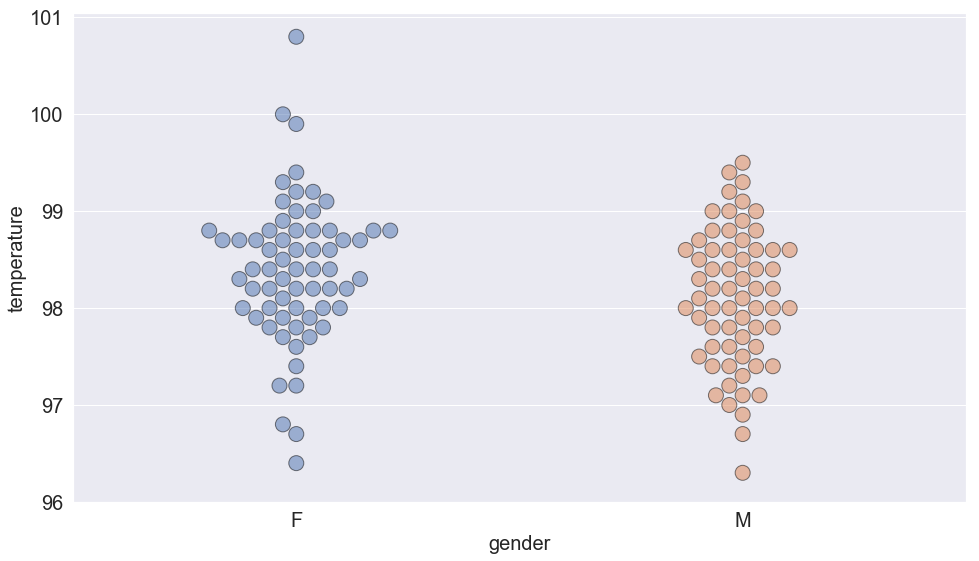

In [20]:
sns.swarmplot(data=df, y="temperature", x="gender", edgecolor="black",alpha=.5, s=15,linewidth=1.0)

## Mean temp of each gender

In [44]:
femaleT = df[df.gender == 'F']['temperature']
fmean = femaleT.mean()


maleT = df[df.gender == 'M']['temperature']
mmean = maleT.mean()

print("The mean female body temperature is", fmean)
print("The mean male body temperature is", mmean)
print("The difference is", fmean - mmean)

The mean female body temperature is 98.39384615384613
The mean male body temperature is 98.1046153846154
The difference is 0.289230769230727


## 2 sample T Test:

Null Hypothesis: M and F have same mean temperature.

Alternate Hypothesis: M and F do not have same mean temperature.

Test Statistic: Difference of mean M body temperature & mean F body temperature.

In [46]:
from scipy import stats

stats.ttest_ind(femaleT, maleT)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The null hypothesis claims that the mean body temperatures of males is the same as the mean body temperature of females.
P-value for two-sample t-test:  0.02393188312239561
Given that the p value is sufficiently small, <0.05, we reject the null hypothesis.

Male body temperatures were found to be statistically different from female body temperatures. It is possible that the data used by Carl Wunderlich to calculate the 98.6 F mean temperature may have been skewed to one gender.